In [234]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  

In [124]:
credDf = pd.read_csv("CSV//credit_card.csv")
credDf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [125]:
credDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [126]:
credDf.Class.unique()

array([0, 1], dtype=int64)

In [127]:
import seaborn as sns

In [128]:
credDf.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [129]:
from imblearn.over_sampling import BorderlineSMOTE 

In [130]:
from sklearn.datasets import make_classification

In [131]:
credDfx = credDf.copy()

In [132]:
credDfx.drop(columns='Class',inplace=True)
credDfx.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [133]:
credDf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [134]:
from collections import Counter
from numpy import where
import matplotlib.pyplot as plt

In [135]:
from imblearn.over_sampling import SMOTE

### ORIGINAL SAMPLE

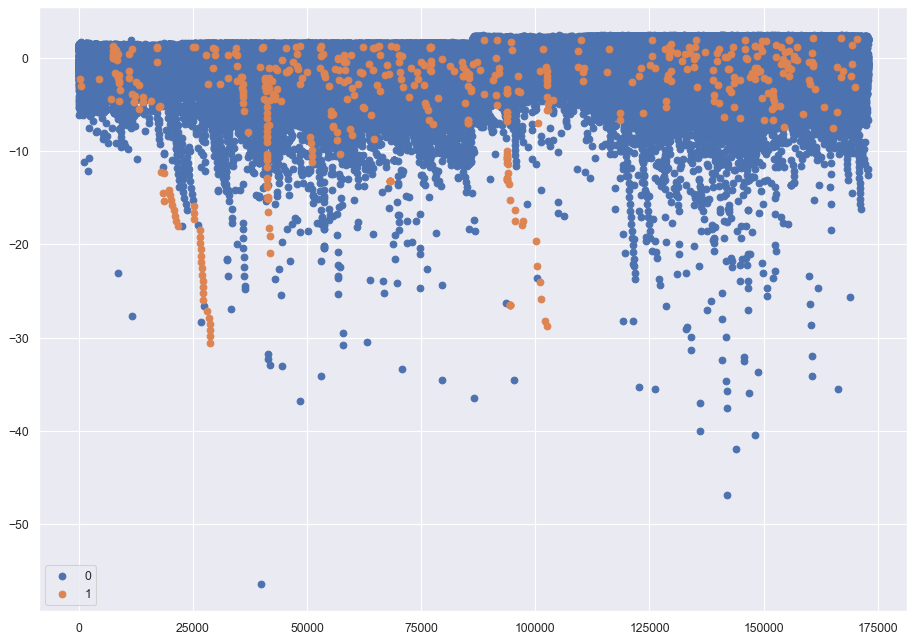

In [136]:
tempX = credDfx.to_numpy()
tempY = credDf.Class.to_numpy()
counter = Counter(tempY)
plt.figure(figsize=(14, 10), dpi=80)
for label, _ in counter.items():
    row_ix = where(tempY == label)[0]
    plt.scatter(tempX[row_ix, 0], tempX[row_ix, 1], label=str(label))
plt.legend()
plt.show()

### SMOTE

In [137]:
sm = SMOTE(random_state=42)
datarsmote, targetrsmote = sm.fit_resample(credDfx, credDf.Class)

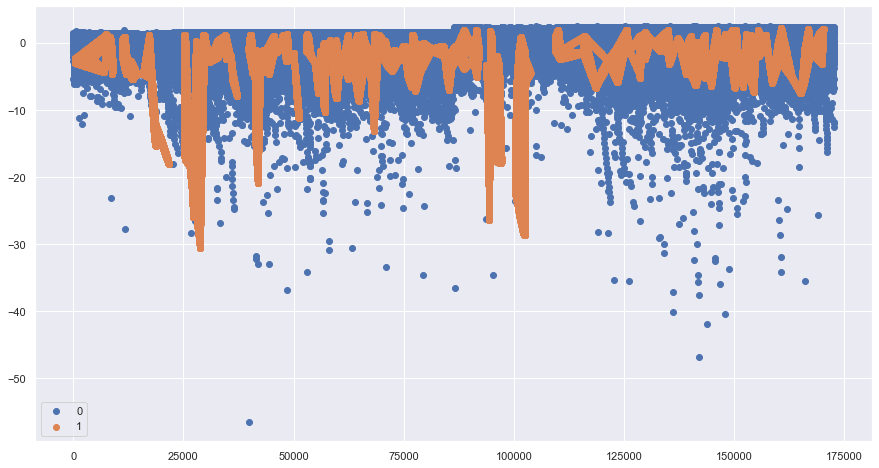

In [138]:
tempXX=datarsmote.to_numpy()
tempYY=targetrsmote.to_numpy()

counter = Counter(tempYY)
for label, _ in counter.items():
	row_ix = where(tempYY == label)[0]
	plt.scatter(tempXX[row_ix, 0], tempXX[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [247]:
SmoteDf = pd.concat([datarsmote, targetrsmote], axis=1)

### BORDERLINE SMOTE

In [139]:
blsm = BorderlineSMOTE(random_state=42)
datars, targetrs = blsm.fit_resample(credDfx, credDf.Class)

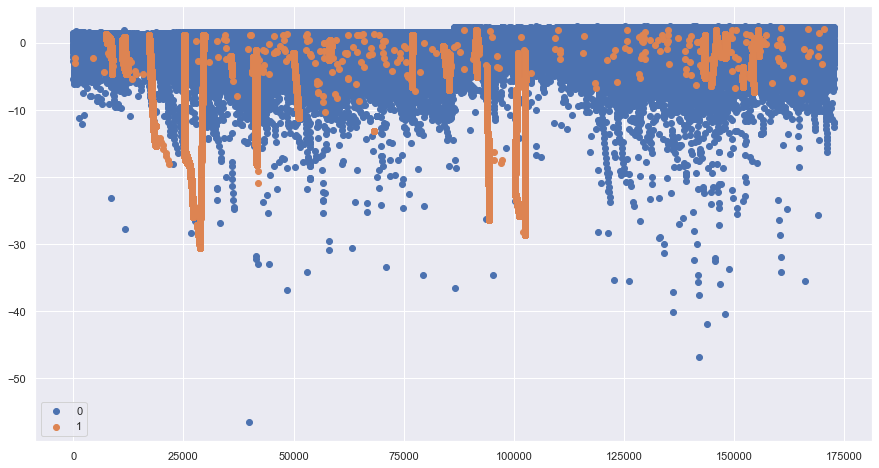

In [140]:
newDatars=datars.to_numpy()
newTargetrs=targetrs.to_numpy()

counter = Counter(newTargetrs)
for label, _ in counter.items():
	row_ix = where(newTargetrs == label)[0]
	plt.scatter(newDatars[row_ix, 0], newDatars[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [141]:
borderLineSmoteDf = pd.concat([datars, targetrs], axis=1)

In [142]:
from imblearn.under_sampling import RandomUnderSampler

In [143]:
# DECLARE TWO UNDERSAMPLING TECHNIQUES
undersampleMajor = RandomUnderSampler(sampling_strategy='majority')
undersamplePercent = RandomUnderSampler(sampling_strategy=0.5)
# FIT MODELS
xUnderPer, yUnderPer = undersamplePercent.fit_resample(credDfx, credDf.Class)
xUnder, yUnder = undersampleMajor.fit_resample(credDfx, credDf.Class)

### ORIGINAL DATA AGAIN

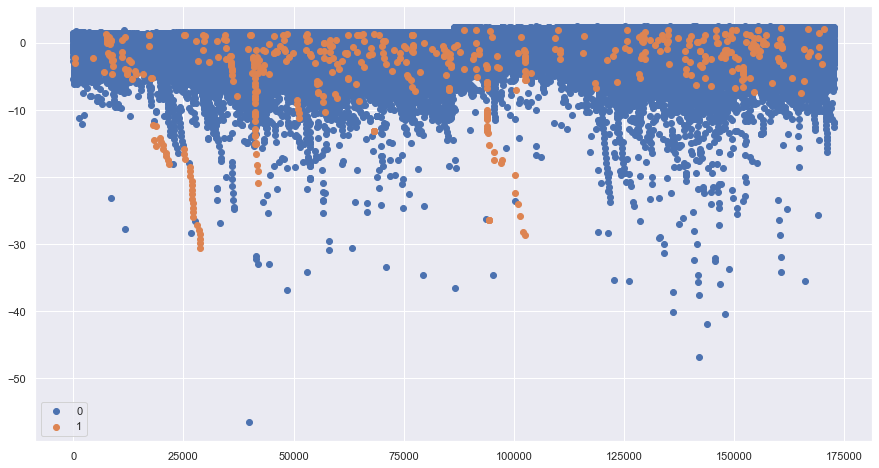

In [144]:
counter = Counter(tempY)
for label, _ in counter.items():
	row_ix = where(tempY == label)[0]
	plt.scatter(tempX[row_ix, 0], tempX[row_ix, 1], label=str(label))
plt.legend()
plt.show()

### UNDERSAMPLE PERCENTAGE

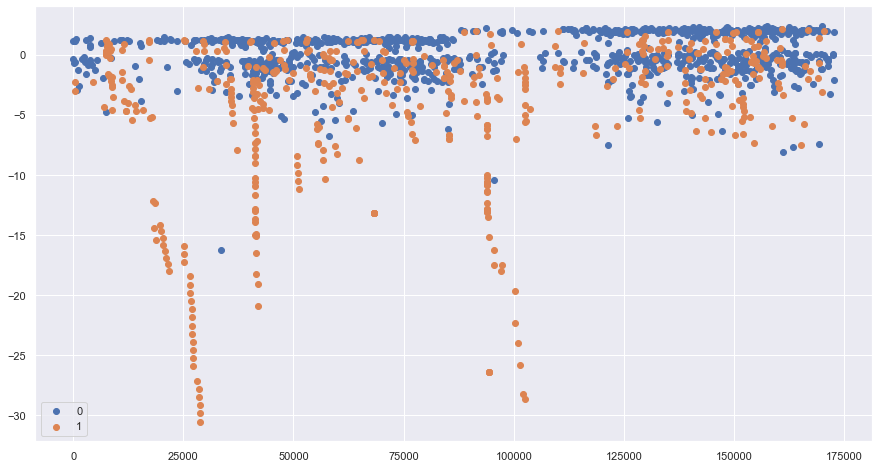

In [145]:
tempXunderMajorPer=xUnderPer.to_numpy()
tempYunderMajorPer=yUnderPer.to_numpy()

counter = Counter(tempYunderMajorPer)
for label, _ in counter.items():
	row_ix = where(tempYunderMajorPer == label)[0]
	plt.scatter(tempXunderMajorPer[row_ix, 0], tempXunderMajorPer[row_ix, 1], label=str(label))
plt.legend()
plt.show()

### UNDERSAMPLE MAJORITY

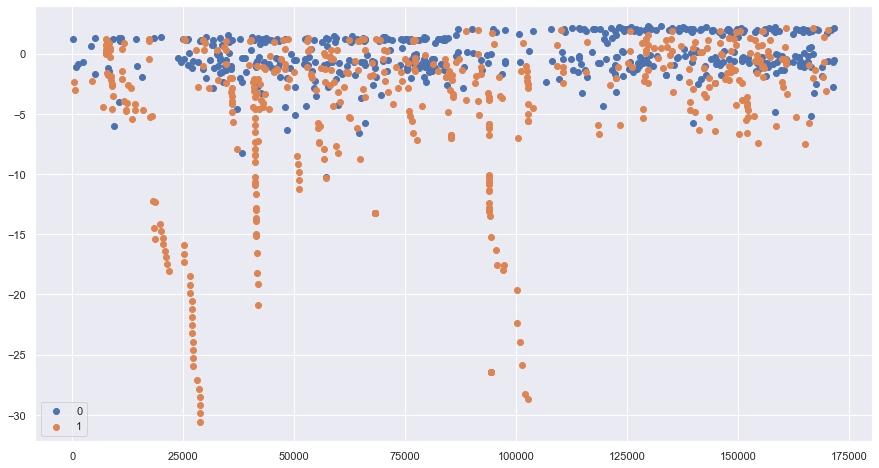

In [146]:
tempXunderMajor=xUnder.to_numpy()
tempYunderMajor=yUnder.to_numpy()

counter = Counter(tempYunderMajor)
for label, _ in counter.items():
	row_ix = where(tempYunderMajor == label)[0]
	plt.scatter(tempXunderMajor[row_ix, 0], tempXunderMajor[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [147]:
underSampledDf = pd.concat([xUnderPer, yUnderPer], axis=1)

In [148]:
print(type(underSampledDf))

<class 'pandas.core.frame.DataFrame'>


In [149]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [150]:
underSampledDfNorm = scale(underSampledDf)

In [ ]:
smoteDfNorm = scale(borderLineSmoteDf)

In [151]:
borderLineSmoteDfNorm = scale(borderLineSmoteDf)

<AxesSubplot:>

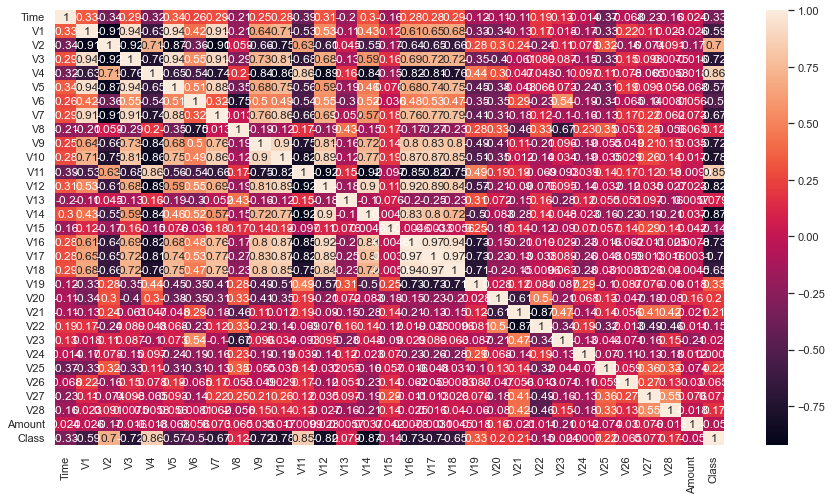

In [152]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(borderLineSmoteDf.corr(), annot = True)

<AxesSubplot:>

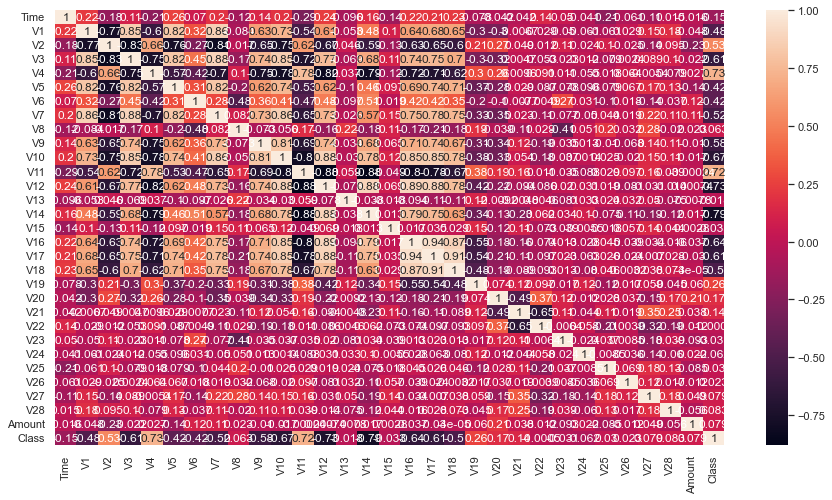

In [153]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(underSampledDf.corr(), annot = True)

#### PCA ON BORDLINESMOTE

In [154]:
pcaBorder = PCA(n_components = 31)

In [155]:
pcaValsBorder = pcaBorder.fit_transform(borderLineSmoteDfNorm)

In [241]:
varBorder = pcaBorder.explained_variance_ratio_

In [242]:
xBorder = pd.DataFrame(pcaBorder.components_)
# xBorder.head(16)

In [243]:
var1Border = np.cumsum(np.round(varBorder, decimals = 4) * 100)

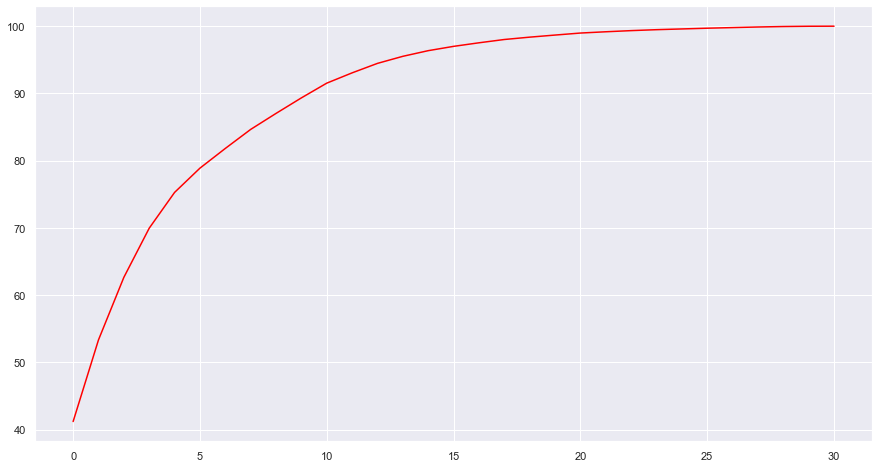

In [244]:
plt.plot(var1Border, color = "red")

In [245]:
pca_dataBorder = pd.DataFrame(pcaValsBorder)

In [167]:
compCol = []
for i in range(31):
    compCol.append('Comp'+str(i))

In [168]:
pca_dataBorder.columns = compCol

In [169]:
pca_dataBorder.head()

,Comp0,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,...,Comp21,Comp22,Comp23,Comp24,Comp25,Comp26,Comp27,Comp28,Comp29,Comp30
0,2.773253,-0.147786,0.575963,-0.283091,0.922948,0.326522,-1.033913,1.470521,1.717303,-0.671743,...,-0.118678,-0.160184,-0.245839,-0.040540,0.057155,0.055956,-0.053144,-0.067122,-0.069331,0.013650
1,2.683190,0.106814,0.774734,-0.334246,0.222502,-0.657931,0.322854,1.770092,0.800634,-0.252178,...,0.160613,0.240996,0.165761,0.233917,-0.071009,-0.024694,-0.060073,0.083417,0.149333,-0.001736
2,3.008108,-0.126941,0.439576,-0.167748,0.395802,1.202023,0.208197,3.075022,1.213932,-1.455123,...,-0.522123,0.099357,-0.199701,-0.261380,-0.241424,0.185142,-0.274133,0.478619,-0.302504,0.039286
3,3.122331,0.194299,0.253071,-1.218522,-0.888375,-0.122475,1.550732,1.597918,0.530881,-0.789748,...,-0.311459,-0.305508,-0.375203,-0.278041,-0.310586,0.478461,-0.222256,0.074117,0.145138,0.005119
4,2.634598,-0.532173,1.098186,0.155040,0.609181,-0.346459,0.178886,1.867269,0.090447,0.698336,...,-0.292389,-0.231953,-0.403428,0.273963,0.158477,0.105406,-0.013554,0.123234,0.112259,0.041845


In [254]:
finalBorder = pd.concat([targetrs, pca_dataBorder.iloc[:, 0:8]], axis = 1)
# finalUnder = pd.concat([yUnderPer, pca_dataUnder.iloc[:, 0:9]], axis = 1)

In [255]:
finalBorder.head()

,Class,0,1,2,3,4,5,6,7
0,0,2.773253,-0.147786,0.575963,-0.283091,0.922948,0.326522,-1.033913,1.470521
1,0,2.683190,0.106814,0.774734,-0.334246,0.222502,-0.657931,0.322854,1.770092
2,0,3.008108,-0.126941,0.439576,-0.167748,0.395802,1.202023,0.208197,3.075022
3,0,3.122331,0.194299,0.253071,-1.218522,-0.888375,-0.122475,1.550732,1.597918
4,0,2.634598,-0.532173,1.098186,0.155040,0.609181,-0.346459,0.178886,1.867269


Exporting PCA TO FILE

In [172]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
finalBorder.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [173]:
import statsmodels.formula.api as smodel

In [174]:
finalBorder.head()

,Class,Comp0,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7
0,0,2.773253,-0.147786,0.575963,-0.283091,0.922948,0.326522,-1.033913,1.470521
1,0,2.683190,0.106814,0.774734,-0.334246,0.222502,-0.657931,0.322854,1.770092
2,0,3.008108,-0.126941,0.439576,-0.167748,0.395802,1.202023,0.208197,3.075022
3,0,3.122331,0.194299,0.253071,-1.218522,-0.888375,-0.122475,1.550732,1.597918
4,0,2.634598,-0.532173,1.098186,0.155040,0.609181,-0.346459,0.178886,1.867269


In [175]:
border_model = smodel.logit('Class ~ Comp0 + Comp1 + Comp2 + Comp3 + Comp4 + Comp5 + Comp6', data = finalBorder).fit() 

Optimization terminated successfully.
         Current function value: 0.010530
         Iterations 15


In [176]:
border_model.summary2() # for AIC
border_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               568630
Model:                          Logit   Df Residuals:                   568622
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Sep 2022   Pseudo R-squ.:                  0.9848
Time:                        21:42:03   Log-Likelihood:                -5987.5
converged:                       True   LL-Null:                   -3.9414e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.8891      0.280     85.178      0.000      23.339      24.439
Comp0        -10.5191      0.109    -96.487      0.000     -10.733     -10.305
Comp1          1.5751      0.045     34.753      0.000       1.486       1.664
Comp2         -0.6103      0.040    -15.278      0.000      -0.689      -0.532
Comp3          0.1840      0.042      4.372      0.000       0.101       0.266
Comp4         -2.7565      0.040    -68.195      0.000      -2.836      -2.677
Comp5          0.0981      0.016      5.994      0.000       0.066       0.130
Comp6          0.4847      0.026     18.434      0.000       0.433       0.536
==============================================================================

Possibly complete quasi-separation: A fraction 0.71 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [177]:
border_pred = border_model.predict(finalBorder.iloc[ :, 0: ])

In [178]:
from sklearn.metrics import roc_curve, auc
fprB, tprB, thresholdsB = roc_curve(finalBorder.Class, border_pred)
optimal_idxB = np.argmax(tprB - fprB)
optimal_thresholdB = thresholdsB[optimal_idxB]
optimal_thresholdB
roc_aucB = auc(fprB, tprB)
print("Area under the ROC curve : %f" % roc_aucB)

Area under the ROC curve : 0.999894


In [179]:
from sklearn.metrics import roc_curve, auc

In [180]:
fprB, tprB, thresholdsB = roc_curve(finalBorder.Class, border_pred)

In [181]:
optimal_idxB = np.argmax(tprB - fprB)

In [182]:
optimal_thresholdB = thresholdsB[optimal_idxB]
optimal_thresholdB

0.31433001109142034

In [183]:
roc_aucB = auc(fprB, tprB)
print("Area under the ROC curve : %f" % roc_aucB)

Area under the ROC curve : 0.999894


In [184]:
finalBorder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Class   568630 non-null  int64  
 1   Comp0   568630 non-null  float64
 2   Comp1   568630 non-null  float64
 3   Comp2   568630 non-null  float64
 4   Comp3   568630 non-null  float64
 5   Comp4   568630 non-null  float64
 6   Comp5   568630 non-null  float64
 7   Comp6   568630 non-null  float64
 8   Comp7   568630 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 39.0 MB


In [185]:
finalBorder["pred"] = np.zeros(568630)

In [186]:
finalBorder.loc[border_pred  > optimal_thresholdB, "pred"] = 1

In [187]:
finalBorder['pred'].value_counts()

1.0    284589
0.0    284041
Name: pred, dtype: int64

In [188]:
from sklearn.metrics import classification_report

In [189]:
classificationB = classification_report(finalBorder["pred"], finalBorder["Class"])
print(classificationB)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284041
         1.0       1.00      1.00      1.00    284589

    accuracy                           1.00    568630
   macro avg       1.00      1.00      1.00    568630
weighted avg       1.00      1.00      1.00    568630



In [190]:
from sklearn.model_selection import train_test_split

In [191]:
train_dataB, test_dataB = train_test_split(finalBorder, test_size = 0.3) # 30% test data

In [192]:
borderTrain_model = smodel.logit('Class ~ Comp0 + Comp1 + Comp2 + Comp3 + Comp4 + Comp5 + Comp6', data = train_dataB).fit()

Optimization terminated successfully.
         Current function value: 0.010725
         Iterations 15


In [193]:
test_predB = border_model.predict(test_dataB)

In [194]:
test_dataB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170589 entries, 51091 to 21380
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Class   170589 non-null  int64  
 1   Comp0   170589 non-null  float64
 2   Comp1   170589 non-null  float64
 3   Comp2   170589 non-null  float64
 4   Comp3   170589 non-null  float64
 5   Comp4   170589 non-null  float64
 6   Comp5   170589 non-null  float64
 7   Comp6   170589 non-null  float64
 8   Comp7   170589 non-null  float64
 9   pred    170589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 14.3 MB


In [195]:
test_dataB["test_pred"] = np.zeros(170589)

In [196]:
test_dataB.loc[test_predB > optimal_thresholdB, "test_pred"] = 1

In [197]:
confusion_matrixB = pd.crosstab(test_dataB.test_pred, test_dataB['Class'])
confusion_matrixB

Class,0,1
test_pred,,
0.0,85162,93
1.0,154,85180


In [198]:
accuracy_testB = (85234+85105)/(85234+85105+84+166)
accuracy_testB

0.9985344893281513

In [199]:
classification_testB = classification_report(test_dataB["test_pred"], test_dataB["Class"])
print(classification_testB)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85255
         1.0       1.00      1.00      1.00     85334

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [200]:
from sklearn import metrics

In [201]:
fprBtest, tprBtest, thresholdBtest = metrics.roc_curve(test_dataB["Class"], test_predB)

Text(0, 0.5, 'True positive rate')

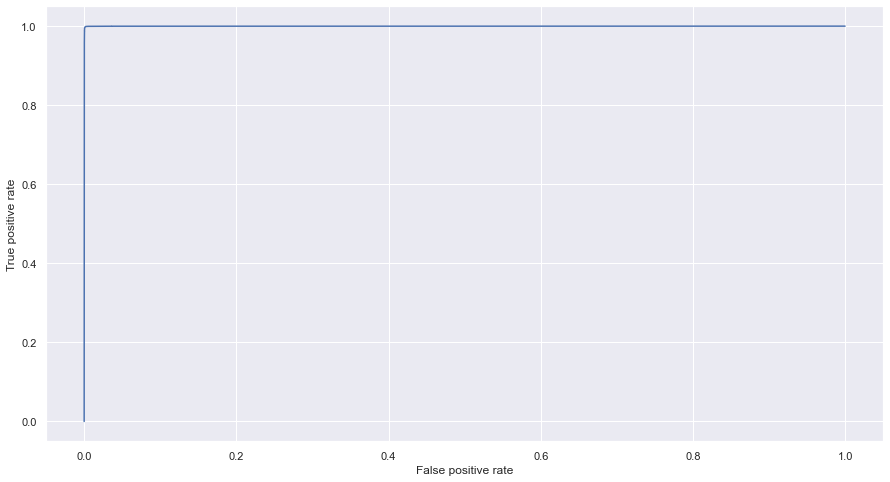

In [202]:
plt.plot(fprBtest, tprBtest);plt.xlabel("False positive rate");plt.ylabel("True positive rate")

In [203]:
roc_auc_test = metrics.auc(fprBtest, tprBtest)
roc_auc_test

0.9999004709354725

In [204]:
train_dataB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398041 entries, 36394 to 67084
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Class   398041 non-null  int64  
 1   Comp0   398041 non-null  float64
 2   Comp1   398041 non-null  float64
 3   Comp2   398041 non-null  float64
 4   Comp3   398041 non-null  float64
 5   Comp4   398041 non-null  float64
 6   Comp5   398041 non-null  float64
 7   Comp6   398041 non-null  float64
 8   Comp7   398041 non-null  float64
 9   pred    398041 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 33.4 MB


In [205]:
train_dataB["train_pred"] = np.zeros(398041)

In [206]:
train_predB = borderTrain_model.predict(train_dataB.iloc[ :, 1: ])

In [207]:
train_dataB.loc[train_predB > optimal_thresholdB, "train_pred"] = 1

In [208]:
confusion_matrxTrainB = pd.crosstab(train_dataB.train_pred, train_dataB['Class'])
confusion_matrxTrainB

Class,0,1
train_pred,,
0.0,198575,229
1.0,424,198813


In [239]:
accuracy_trainB = (198488 + 198892)/(198488+198892+234+427)
print(accuracy_trainB)

0.998339367050128


UNDER SamplingMODEL

In [240]:
under_model = smodel.logit('Class ~ Comp0 + Comp1 + Comp2 + Comp3 + Comp4 + Comp5 + Comp6 + Comp7 + Comp8', data = finalUnder).fit() 

NameError: name 'finalUnder' is not defined

In [ ]:
under_pred = under_model.predict(finalUnder.iloc[:,0:])

In [ ]:
fprU, tprU, thresholdsU = roc_curve(finalUnder.Class, under_pred)

In [ ]:
optimal_idxU = np.argmax(tprU - fprU)

In [ ]:
optimal_thresholdU = thresholdsU[optimal_idxU]
optimal_thresholdU

In [ ]:
roc_aucU = auc(fprU, tprU)
print("Area under the ROC curve : %f" % roc_aucU)

In [ ]:
finalUnder.info()

In [ ]:
finalUnder["pred"] = np.zeros(1476)

In [ ]:
finalUnder.loc[under_pred > optimal_thresholdU, "pred"] = 1

In [ ]:
finalUnder['pred'].value_counts()

In [ ]:
classificationUnder = classification_report(finalUnder["pred"], finalUnder["Class"])
print(classificationUnder)

In [ ]:
train_dataU, test_dataU = train_test_split(finalUnder, test_size = 0.3) # 30% test data

In [ ]:
underTrain_model = smodel.logit('Class ~ Comp0 + Comp1 + Comp2 + Comp3 + Comp4 + Comp5 + Comp6 + Comp7 + Comp8', data = train_dataU).fit() 

In [ ]:
underTrain_model.summary2() # for AIC
underTrain_model.summary()

In [216]:
test_pred = logit_model.predict(test_data)

NameError: name 'logit_model' is not defined

#### KNN

In [217]:
finalBorder.head()
finalBorder2 = finalBorder.copy()

In [218]:
finalBorder2.drop(columns='pred',inplace=True)

In [219]:
trainData, testData = train_test_split(finalBorder2,test_size=.3)

In [220]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398041 entries, 539651 to 444866
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Class   398041 non-null  int64  
 1   Comp0   398041 non-null  float64
 2   Comp1   398041 non-null  float64
 3   Comp2   398041 non-null  float64
 4   Comp3   398041 non-null  float64
 5   Comp4   398041 non-null  float64
 6   Comp5   398041 non-null  float64
 7   Comp6   398041 non-null  float64
 8   Comp7   398041 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 30.4 MB


In [221]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170589 entries, 192344 to 317773
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Class   170589 non-null  int64  
 1   Comp0   170589 non-null  float64
 2   Comp1   170589 non-null  float64
 3   Comp2   170589 non-null  float64
 4   Comp3   170589 non-null  float64
 5   Comp4   170589 non-null  float64
 6   Comp5   170589 non-null  float64
 7   Comp6   170589 non-null  float64
 8   Comp7   170589 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 13.0 MB


In [222]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(trainData)

# trainData = scaler.transform(trainData)
# testData = scaler.transform(testData)

In [223]:
traintarget = trainData.Class 
testtarget = testData.Class

In [224]:
trainData.drop(columns='Class',inplace=True)
testData.drop(columns='Class',inplace=True)

In [225]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(trainData, traintarget)

KNeighborsClassifier()

In [229]:
type(testData)

pandas.core.frame.DataFrame

In [226]:
testData

,Comp0,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7
192344,2.974970,-1.190718,-0.052668,0.041009,0.381831,2.293978,0.416007,-0.496099
396377,-0.178480,-0.868410,-0.370121,0.332601,0.034963,-0.490041,1.165440,-1.918768
295033,-5.237532,0.385564,1.591162,-2.831825,0.491643,0.264992,-0.400299,-0.336690
76,2.588749,-0.293070,0.147356,-0.118309,-0.165821,-0.211815,-0.144823,0.866054
53588,2.747850,-0.763545,0.124852,-0.396550,1.121265,-0.662251,-0.288112,0.414487
...,...,...,...,...,...,...,...,...
140547,2.725804,0.111387,0.666586,-0.698141,0.286875,-0.494380,0.550581,0.455957
378389,-5.545574,-0.549620,-1.951102,1.307294,0.294002,-0.266253,0.716459,-1.728627
547255,-5.962452,-0.658045,0.282315,1.946838,1.950204,-0.497105,0.537091,0.758502
116734,2.991082,-0.116393,0.397672,-0.669126,-0.085299,-0.456969,0.503811,0.757792


In [227]:
testpred = classifier.predict(testData)

In [228]:
testpred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [230]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testtarget, testpred))
print(classification_report(testtarget, testpred))

[[85158    10]
 [   20 85401]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85168
           1       1.00      1.00      1.00     85421

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [232]:
# error = []

# # Calculating error for K values between 1 and 40
# for i in range(1, 40):
#     print(i)
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(trainData, traintarget)
#     pred_i = knn.predict(testData)
#     error.append(np.mean(pred_i != testpred))

In [233]:
# plt.figure(figsize=(12, 6))
# plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
#          markerfacecolor='blue', markersize=10)
# plt.title('Error Rate K Value')
# plt.xlabel('K Value')
# plt.ylabel('Mean Error')

##### NAIVE BAYEs

In [236]:
nb = GaussianNB()
nb.fit(trainData, traintarget)
print("Naive Bayes score: ",nb.score(testData, testtarget))
nb.predict(testData)

Naive Bayes score:  0.9730228795526089


array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

#### DECISIONTREe

In [238]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(trainData, traintarget)
print("classifier score: ",classifier.score(testData, testtarget))
#Predicting the test set result  
ypred= classifier.predict(testData)
# print(ytest,ypred)


classifier score:  0.9996600015241311


##### ----------------------------------------
##### -------------------------PCA FOR SMOTE

In [259]:
pcaSMOTE = PCA(n_components = 31)
smoteDfNorm = scale(SmoteDf)
pcaValsSMOTE = pcaSMOTE.fit_transform(smoteDfNorm)
varSMOTE = pcaSMOTE.explained_variance_ratio_
xSMOTE = pd.DataFrame(pcaSMOTE.components_)

var1SMOTE = np.cumsum(np.round(varSMOTE, decimals = 4) * 100)

pca_dataSMOTE = pd.DataFrame(pcaValsSMOTE)

compCol = []
for i in range(31):
    compCol.append('Comp'+str(i))
    
pca_dataSMOTE.columns = compCol
pca_dataSMOTE.head()

finalSMOTE = pd.concat([targetrsmote, pca_dataSMOTE.iloc[:, 0:8]], axis = 1)


In [ ]:
# plt.plot(var1Border, color = "red")

In [260]:
finalSMOTE.head()

,Class,Comp0,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7
0,0,-2.311276,0.084743,0.350731,0.954092,0.366310,1.145618,-0.539732,-1.603929
1,0,-2.208652,0.490268,0.285551,0.801264,-0.339676,0.333030,-1.667131,-0.315705
2,0,-2.420486,-0.271924,-0.042426,0.370257,0.213881,2.537218,-1.625969,-0.592965
3,0,-2.629152,0.122159,-0.186442,0.625113,-1.628142,0.865366,-1.308550,0.890130
4,0,-2.176751,-0.151861,0.860229,0.732663,0.457854,0.570106,-2.019487,-0.458727


In [261]:
compression_opts = dict(method='zip',
                        archive_name='finalSMOTEt.csv')  
finalSMOTE.to_csv('finalSMOTE.zip', index=False,
          compression=compression_opts)  

##### ----------------------------------------
##### -------------------------PCA FOR undersampilg

In [267]:
pcaUnder = PCA(n_components = 31)

underDf = pd.concat([xUnder, yUnder], axis=1)
underNorm = scale(underDf)
pcaValsunder = pcaUnder.fit_transform(underNorm)
varunder = pcaUnder.explained_variance_ratio_
xunder = pd.DataFrame(pcaUnder.components_)

var1under = np.cumsum(np.round(varunder, decimals = 4) * 100)

pca_dataunder = pd.DataFrame(pcaValsunder)

compCol = []
for i in range(31):
    compCol.append('Comp'+str(i))
    
pca_dataunder.columns = compCol
pca_dataunder.head()

finalunder = pd.concat([yUnder, pca_dataunder.iloc[:, 0:8]], axis = 1)

In [268]:
finalunder.head()

,Class,Comp0,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7
0,0,-2.273270,0.205620,-0.205162,0.286654,0.885445,0.389934,-0.974593,0.262505
1,0,-2.037023,0.392669,0.102340,0.303472,1.333432,0.677873,-0.860283,-0.891067
2,0,-2.360591,1.629948,-1.932051,-0.113252,0.177590,-2.008080,1.434881,-0.717809
3,0,-2.476543,0.465264,0.327450,-0.022206,-0.001519,-0.895545,0.152274,-0.297923
4,0,-2.354284,-0.016998,-0.677471,0.513531,0.236156,1.228189,-1.675914,-0.028905


In [269]:
compression_opts = dict(method='zip',
                        archive_name='finalunder.csv')  
finalunder.to_csv('finalunder.zip', index=False,
          compression=compression_opts)  